<a href="https://colab.research.google.com/github/harshithgowdakc/own_projects/blob/main/Processing_image_data_for_Deep_Learninged31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
 #importing the dependence
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [41]:
# import images sourse
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [42]:
# importing dependence for deep learning
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [43]:
#loading the MNIST data from keras datset
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [44]:
#checking the data
type(x_train)

numpy.ndarray

In [45]:
#checking shape
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [46]:
#print the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [47]:
print(x_train[10].shape)

(28, 28)


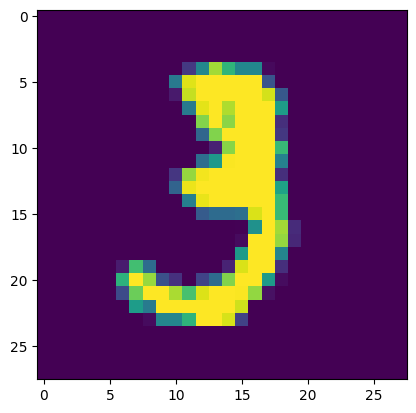

In [48]:
# displaying the image
plt.imshow(x_train[10])

In [49]:
#image labels
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [50]:
# finding unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [51]:
# finding unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [52]:
# Scaling the values
x_train = x_train/255
x_test = x_test/255
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [53]:
# Buliding up neural network
# setting up the layers of a neutal network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [54]:
# compling the neural network
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# training the neural network
model.fit(x_train,y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1452 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0891 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0738 - accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0624 - accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9825
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0486 - accuracy: 0.9842
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0424 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.037

In [56]:
#accuracy on test data
loss_accuracy = model.evaluate(x_test,y_test)
print(loss_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9738
[0.09687860310077667, 0.973800003528595]


In [57]:
print(x_test.shape)

(10000, 28, 28)


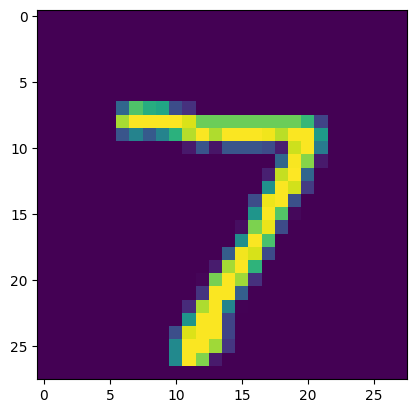

In [61]:
# first datapoint in x_test
plt.imshow(x_test[0])
plt.show()

In [62]:
print(y_test[0])

7
